In [10]:
import pandas as pd
customer_acquisition = pd.read_csv("C:\\Log\\Customer Acqusition.csv")
spend=pd.read_csv("C:\\Log\\spend.csv")
repayment=pd.read_csv("C:\\Log\\Repayment.csv")

In [11]:
repayment.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [12]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
customer_acqusition.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [ ]:
#  a. In case age is less than 18, replace it with mean of age values

In [14]:
mean_age = customer_acquisition['Age'].mean()

mean_age= customer_acquisition.loc[customer_acquisition['Age'] < 18, 'Age']

customer_acquisition.to_csv('updated_customer_acquisition.csv', index=False)

customer_acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [ ]:
#  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

In [15]:
spend_with_limit = pd.merge(spend, customer_acquisition[['Customer', 'Limit']], on='Customer')

spend_with_limit['Amount'] = spend_with_limit.apply(
    lambda row: row['Limit'] * 0.5 if row['Amount'] > row['Limit'] else row['Amount'], axis=1)

spend_with_limit.to_csv('modified_spend.csv', index=False)



In [ ]:
#  c. Incase the repayment amount is more than the limit, replace the repayment with the 
# limit.

In [17]:

repayment = repayment.loc[:, ~repayment.columns.str.contains('^Unnamed')]

repayment = repayment.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', how='left')

repayment['Amount'] = repayment.apply(lambda row: min(row['Amount'], row['Limit']), axis=1)

repayment.drop('Limit', axis=1, inplace=True)

repayment.to_csv('Updated_Repayment.csv', index=False)

print("\nUpdated Repayment Data:")
print(repayment.head())


Updated Repayment Data:
   SL No: Customer      Month     Amount
0     NaN       A1  12-Jan-04  495414.75
1     2.0       A1   3-Jan-04  245899.02
2     3.0       A1  15-Jan-04  259490.06
3     4.0       A1  25-Jan-04  437555.12
4     5.0       A1  17-Jan-05  165972.88


In [ ]:
#  a. How many distinct customers exist?

In [18]:

all_customers = pd.concat([customer_acquisition['Customer'], spend['Customer'], repayment['Customer']])

distinct_customers = all_customers.nunique()

print("Number of distinct customers:", distinct_customers)

Number of distinct customers: 100


In [ ]:
# c. What is the average monthly spend by customers?

In [20]:
distinct_categories_ca = {}
relevant_columns_ca = ['City', 'Product', 'Company', 'Segment']
for col in relevant_columns_ca:
    distinct_categories_ca[col] = len(customer_acquisition[col].unique())

distinct_categories_spend = {'Type': len(spend['Type'].unique())}

distinct_categories_repayment = {'Month': len(repayment['Month'].unique())}

print("Distinct Categories in Customer Acquisition Dataset:")
print(distinct_categories_ca)
print("\nDistinct Categories in Spend (Transaction Data) Dataset:")
print(distinct_categories_spend)
print("\nDistinct Months in Repayment Dataset:")
print(distinct_categories_repayment)


Distinct Categories in Customer Acquisition Dataset:
{'City': 8, 'Product': 3, 'Company': 41, 'Segment': 5}

Distinct Categories in Spend (Transaction Data) Dataset:
{'Type': 15}

Distinct Months in Repayment Dataset:
{'Month': 75}


In [ ]:
#  d. What is the average monthly repayment by customers?

In [22]:
monthly_spend = spend.groupby(['Customer', 'Month'])['Amount'].sum().reset_index()

average_monthly_spend = monthly_spend['Amount'].mean()

print("Average monthly spend by customers:", average_monthly_spend)


Average monthly spend by customers: 290090.75114558474


In [ ]:
#  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
# (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment 
# – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [27]:
monthly_repayment = repayment.groupby(['Customer', 'Month'])['Amount'].sum().reset_index()

average_monthly_repayment = monthly_repayment.groupby('Customer')['Amount'].mean().reset_index()

average_monthly_repayment.columns = ['Customer', 'Average Monthly Repayment']

print(average_monthly_repayment)

   Customer  Average Monthly Repayment
0        A1              316912.778000
1       A10              230977.970000
2      A100               69551.190000
3       A11              331933.376875
4       A12              320567.698462
..      ...                        ...
95      A95              369405.960000
96      A96              100000.000000
97      A97               10000.000000
98      A98               10001.000000
99      A99               10002.000000

[100 rows x 2 columns]


In [29]:
merged_data = pd.merge(customer_acquisition, spend, on='Customer', how='inner')
merged_data = pd.merge(merged_data, repayment, on=['Customer', 'Month'], how='inner')

merged_data['Monthly_Profit'] = merged_data['Amount_y'] - merged_data['Amount_x']  # repayment amount - spend amount

monthly_interest_rate = 0.029

merged_data['Interest_Earned'] = merged_data['Monthly_Profit'].apply(lambda x: x * monthly_interest_rate if x > 0 else 0)

monthly_profit_summary = merged_data.groupby('Month')['Interest_Earned'].sum().reset_index()

print(monthly_profit_summary)


        Month  Interest_Earned
0    1-Apr-06      31444.25427
1    1-Feb-05      23989.77730
2    1-Jun-05      12157.66159
3   10-May-06      17277.39264
4   11-Jul-06       3433.50198
..        ...              ...
69   6-Apr-04       1434.16107
70   6-May-06      29502.03321
71   7-May-05       3099.71169
72   8-May-06      16357.79568
73   9-May-05       7158.15613

[74 rows x 2 columns]


In [ ]:
#  f. What are the top 5 product types?

In [30]:
product_counts = customer_acquisition['Product'].value_counts()

top_5_products = product_counts.head(5)
top_5_products

Product
Gold        38
Platimum    32
Silver      30
Name: count, dtype: int64

In [ ]:
#  g. Which city is having maximum spend?

In [31]:
merged_data = pd.merge(spend, customer_acquisition, on='Customer')

city_spend = merged_data.groupby('City')['Amount'].sum().reset_index()

max_spend_city = city_spend.loc[city_spend['Amount'].idxmax()]

print("City with maximum spend:", max_spend_city['City'])
print("Total spend in that city:", max_spend_city['Amount'])

City with maximum spend: COCHIN
Total spend in that city: 73495349.26


In [ ]:
#  h. Which age group is spending more money?

In [36]:

bins = [0, 18, 30, 40, 50, 60, float('inf')]
labels = ['Under 18', '18-30', '31-40', '41-50', '51-60', 'Over 60']

# Group the data by age groups and calculate the total spent amount for each group
spend['Age'] = pd.cut(spend['Age'], bins=bins, labels=labels, right=False)
spending_by_age_group = spend.groupby('Age')['Amount'].sum()

# Find the age group spending the most money
max_spending_age_group = spending_by_age_group.idxmax()
max_spending_amount = spending_by_age_group.max()

print(f"The age group spending the most money is {max_spending_age_group} with a total spending of {max_spending_amount}.")


KeyError: 'Age'

In [ ]:
# i. Who are the top 10 customers in terms of repayment?

In [37]:

repayment_summary = repayment.groupby('Customer')['Amount'].sum().reset_index()

repayment_summary = repayment_summary.sort_values(by='Amount', ascending=False)

top_10_customers = repayment_summary.head(10)

print("Top 10 Customers in terms of Repayment:")
print(top_10_customers)


Top 10 Customers in terms of Repayment:
   Customer       Amount
58      A61  10539142.91
57      A60   9876290.74
5       A13   9572000.66
38      A43   8489871.46
40      A45   8448334.87
4       A12   8334760.16
6       A14   7943268.63
39      A44   7744730.12
33      A39   7622483.30
37      A42   7615460.86


In [ ]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
# representation for the same.

C:\Users\Pankaj soni\AppData\Local\Temp\ipykernel_376\2695680827.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year


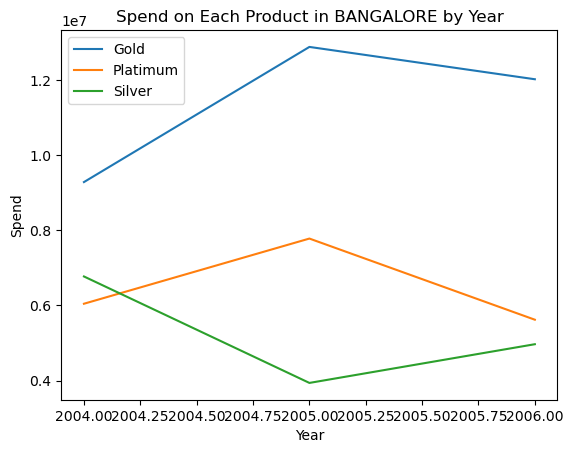

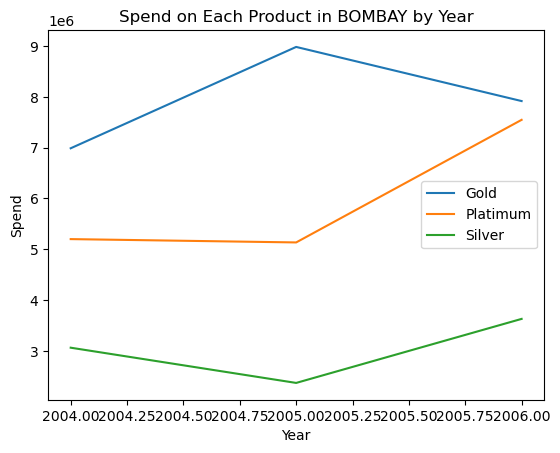

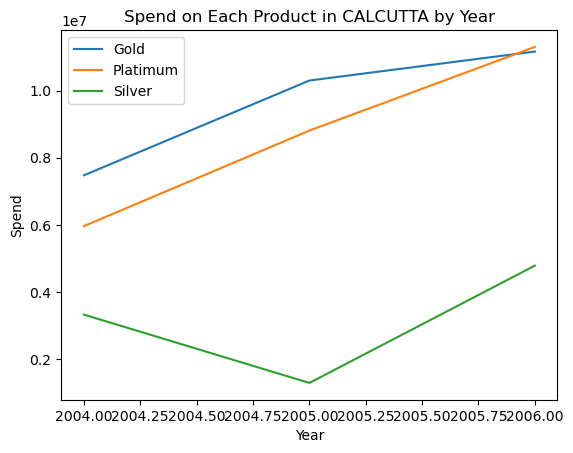

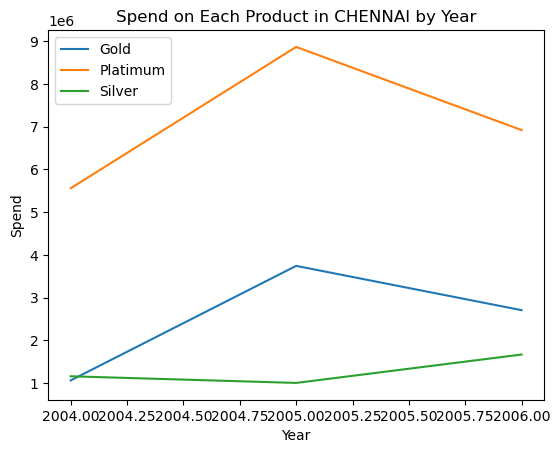

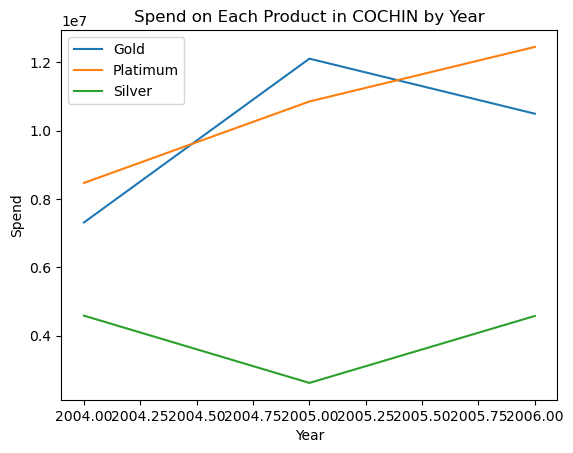

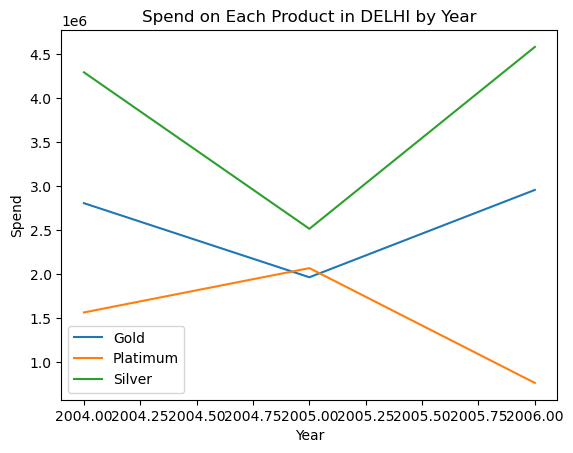

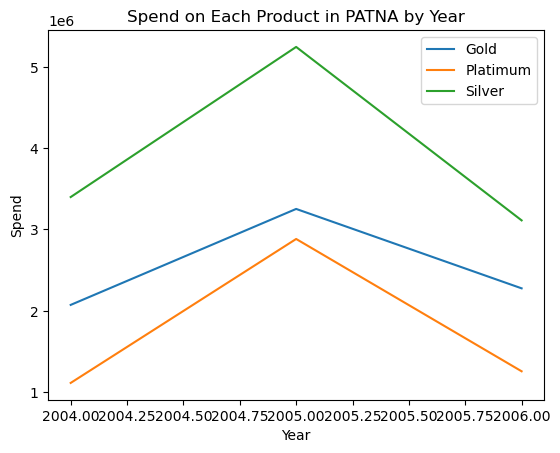

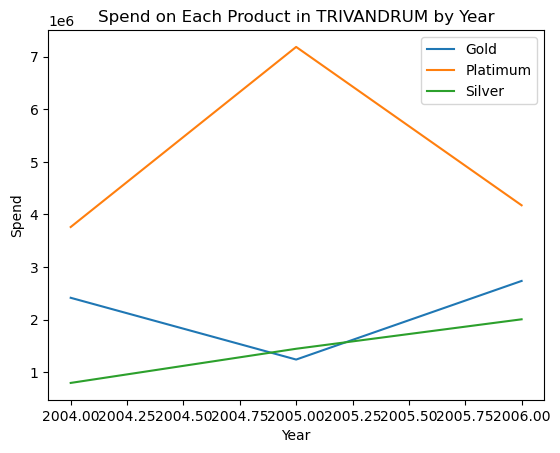

In [38]:
import matplotlib.pyplot as plt

merged_data = pd.merge(spend, customer_acquisition, on="Customer")

merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year

city_product_yearly_spend = merged_data.groupby(['City', 'Product', 'Year'])['Amount'].sum().reset_index()

for city in city_product_yearly_spend['City'].unique():
    city_data = city_product_yearly_spend[city_product_yearly_spend['City'] == city]
    for product in city_data['Product'].unique():
        product_data = city_data[city_data['Product'] == product]
        plt.plot(product_data['Year'], product_data['Amount'], label=product)
    plt.title(f'Spend on Each Product in {city} by Year')
    plt.xlabel('Year')
    plt.ylabel('Spend')
    plt.legend()
    plt.show()


In [ ]:
# 4. Create graphs for
#  a. Monthly comparison of total spends, city wise

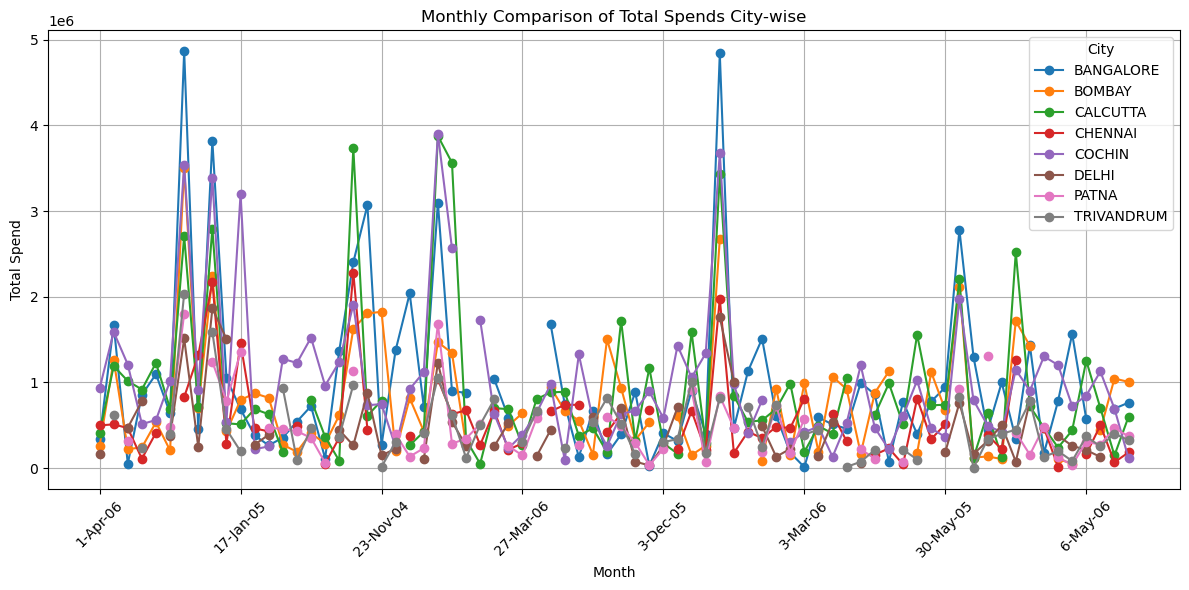

In [39]:
merged_data = pd.merge(spend, customer_acquisition, on='Customer')

monthly_spend_citywise = merged_data.groupby(['Month', 'City'])['Amount'].sum().reset_index()

pivot_table = monthly_spend_citywise.pivot(index='Month', columns='City', values='Amount')

pivot_table.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Monthly Comparison of Total Spends City-wise')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.grid(True)
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by 
# different products and by different time periods i.e. year or month. The user should be able 
# to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
# function should automatically take these inputs while identifying the top 10 customers.

In [60]:
import pandas as pd
repayment = repayment.loc[:, ~repayment.columns.str.contains('^Unnamed')]

merged_data = pd.merge(customer_acquisition, spend, on='Customer')
merged_data = pd.merge(merged_data, repayment, on=['Customer', 'Month'])


def filter_data_by_product_and_time(data, product, time_period):
    filtered_data = data[data['Product'] == product]
    if time_period == 'yearly':
        filtered_data['Year'] = pd.to_datetime(filtered_data['Month']).dt.year
        time_col = 'Year'
    elif time_period == 'monthly':
        filtered_data['Month'] = pd.to_datetime(filtered_data['Month']).dt.to_period('M')
        time_col = 'Month'
    return filtered_data, time_col


def calculate_top_customers(data, time_col):
    grouped_data = data.groupby(['City', 'Customer', time_col])['Amount'].sum().reset_index()
    top_customers = grouped_data.groupby(['City', time_col]).apply(lambda x: x.nlargest(10, 'Amount')).reset_index(drop=True)
    return top_customers

def find_top_customers(product, time_period):
    filtered_data, time_col = filter_data_by_product_and_time(merged_data, product, time_period)
    top_customers = calculate_top_customers(filtered_data, time_col)
    return top_customers


